In [100]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.style.use("ggplot")

## Algorithm

1. Load The Data
2. Choose number of k neighbors
3. calculate the distance from desired point to all points in the dataset
4. sort the results
5. choose the smallest k distances
6. evaluate the target for those neighbors
7. get most frequent target
8. make that your prediction for point

In [40]:
data = pd.read_csv("iris.csv")
data.rename(columns = {'variety':'target'}, inplace = True)
data[data["target"] == "Versicolor"].sort_values("petal.length")

,sepal.length,sepal.width,petal.length,petal.width,target
98,5.1,2.5,3.0,1.1,Versicolor
93,5.0,2.3,3.3,1.0,Versicolor
57,4.9,2.4,3.3,1.0,Versicolor
79,5.7,2.6,3.5,1.0,Versicolor
60,5.0,2.0,3.5,1.0,Versicolor
64,5.6,2.9,3.6,1.3,Versicolor
81,5.5,2.4,3.7,1.0,Versicolor
80,5.5,2.4,3.8,1.1,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
82,5.8,2.7,3.9,1.2,Versicolor


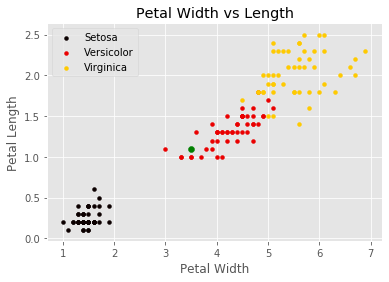

In [101]:
# Using only 2 features to visualize the data in R2
# species are clearly distinguishable using these 2 data attributes
pl=data['petal.length']
pw=data['petal.width']
uniq = list(set(data['target']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = data['target'] == uniq[i]
    plt.scatter(pl[indx], pw[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
plt.scatter(3.5, 1.1, color = "green") # test point to be used, made sure this point didnt exist in the dataset
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width vs Length')
plt.legend(loc='upper left')
plt.show()
# plt.scatter(data["sepal.length"], data["sepal.width"], color = data["target"])

In [5]:
# have to calculate euclidean distance to evaluate neighbors
def euclidean_distance(x, y, length):
    distance = 0.0
    #iterating through the different features
    for i in range(length):
        distance += (x[i] - y[i])**2
    return np.sqrt(distance)

In [96]:
# K-nearest neighbors algorithm

def knn(train, test, k):
 
    distances = {} # initializing empty distances dictionary
    sort = {} # where the sorted results will be stored
    neighbors = []
 
    length = test.shape[1] # 4 becuase of 4 features
    
    # calculate euclidian distance between data and test point
    # store in sitance
    for i in range(len(train)):
        dist = euclidean_distance(test, train.iloc[i], length)
        distances[i] = dist[0]
    # sort in ascending order
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    
    # take k number of lowest values
    for i in range(k):
        neighbors.append(sortdist[i][0])
    species = {} 
    for i in range(len(neighbors)):
        response = train.iloc[neighbors[i]][-1]
        # making a counter for num of species instances
        if response in species:
            species[response] += 1
        else:
            species[response] = 1
    # sort to get most prevalent species
    sortvotes = sorted(species.items(), key=operator.itemgetter(1), reverse=True)
    return(sortvotes[0][0])

In [99]:
# Our chosen test point, expected to output versicolor
testpoint = pd.DataFrame([[3.5, 1.1, 2.1, 5.1]])

knn(data, testpoint, 5)

'Versicolor'